In [1]:
#Import Packages
##Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from scipy.signal import find_peaks

In [2]:
cols = ["wavelength", "intensity"]
raw_data = pd.read_csv("DataFiles/S", delimiter="\t", names=cols)
raw_background = pd.read_csv("DataFiles/test_background_0.3.txt", delimiter="\t", names=cols)

raw_data

,wavelength,intensity
0,900.000,0.0000
1,899.875,0.0000
2,899.750,0.0000
3,899.625,0.0000
4,899.500,0.0000
...,...,...
4795,300.625,0.0432
4796,300.500,0.0471
4797,300.375,0.0448
4798,300.250,0.0463


In [3]:
peaks, properties = find_peaks(raw_data["intensity"], height=0, prominence=.1, distance=50, width=5)#, threshold=12, distance=1)#, width=2)

peaks

raw_data["wavelength"][peaks]

2104    637.000
3461    467.375
3875    415.625
4067    391.625
Name: wavelength, dtype: float64

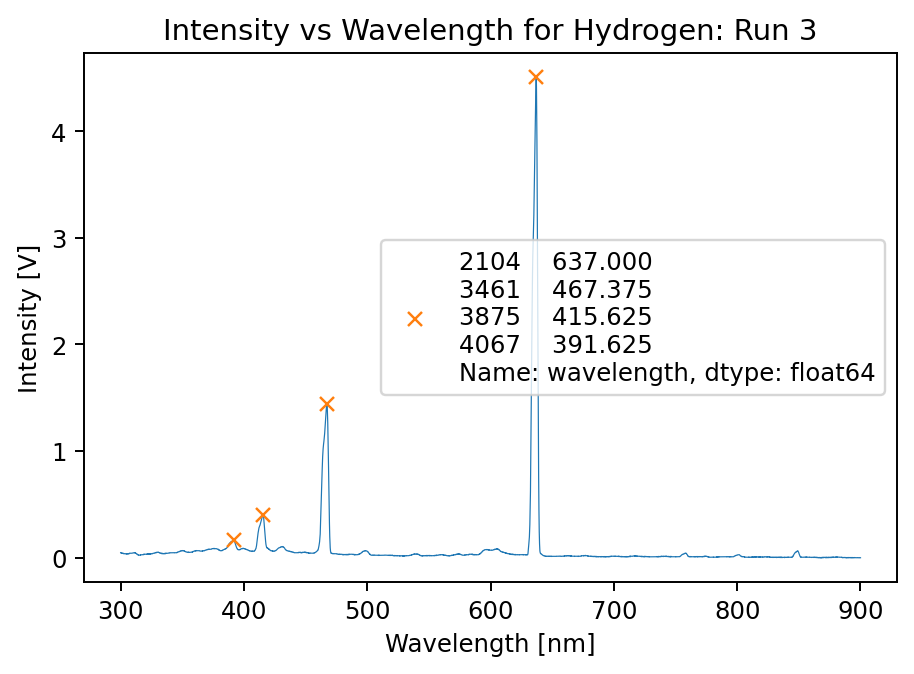

In [4]:
plt.figure(dpi=175)
plt.title("Intensity vs Wavelength for Hydrogen: Run 3")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [V]")
plt.plot(raw_data["wavelength"], raw_data["intensity"], lw=.5)
plt.plot(raw_data["wavelength"][peaks], raw_data["intensity"][peaks], "x", label=raw_data["wavelength"][peaks])
plt.legend()

In [5]:
properties#[2290]

{'peak_heights': array([4.5059, 1.4386, 0.4001, 0.1635]),
 'prominences': array([4.4902, 1.4151, 0.3585, 0.1046]),
 'left_bases': array([ 275, 2988, 3561, 3949]),
 'right_bases': array([2841, 4678, 4678, 4678]),
 'widths': array([37.54862804, 44.41993083, 46.10869144, 52.37272727]),
 'width_heights': array([2.2608 , 0.73105, 0.22085, 0.1112 ]),
 'left_ips': array([2093.19558965, 3449.58097826, 3862.76829268, 4050.92727273]),
 'right_ips': array([2130.74421769, 3494.00090909, 3908.87698413, 4103.3       ])}

In [6]:
366.875
424.750
479.250
564.875
645.000
684.000
755.375

755.375

In [7]:
raw_data["wavelength"][peaks]

2104    637.000
3461    467.375
3875    415.625
4067    391.625
Name: wavelength, dtype: float64

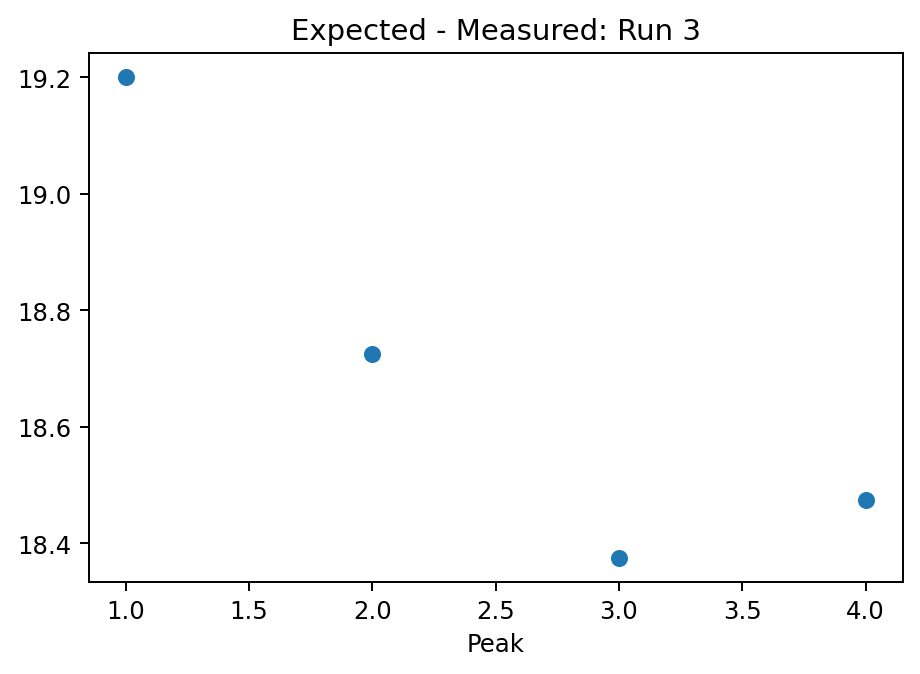

In [8]:
expected = np.array([656.2, 486.1, 434.0, 410.1])


plt.figure(dpi=175)
plt.title("Expected - Measured: Run 3")
plt.xlabel("Peak")

plt.scatter([1,2,3,4], (expected) - raw_data["wavelength"][peaks])

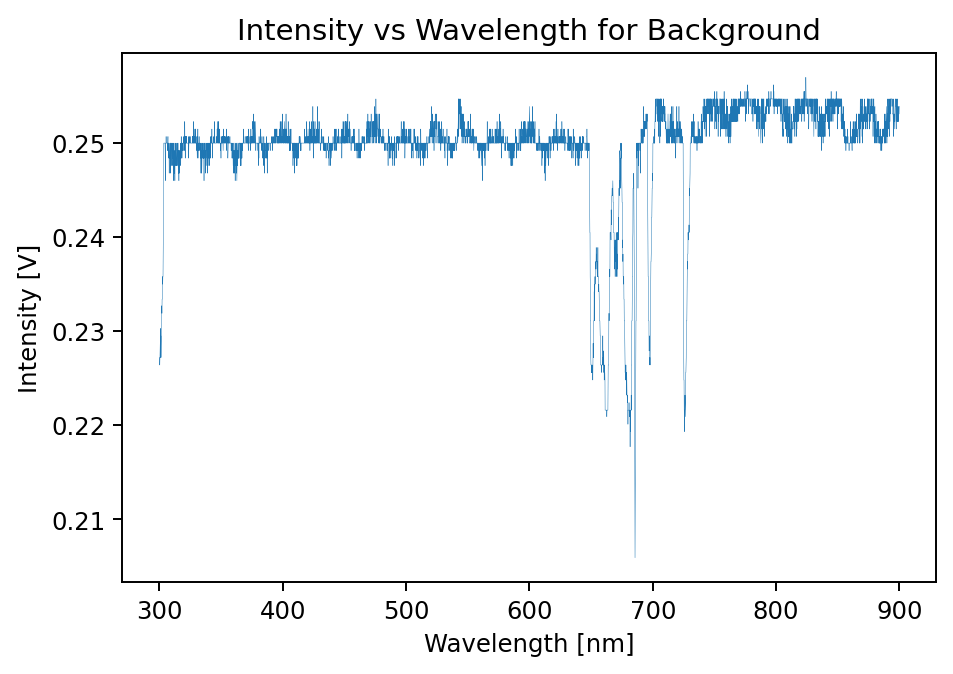

In [9]:
plt.figure(dpi=175)
plt.title("Intensity vs Wavelength for Background")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [V]")
plt.plot(raw_background["wavelength"], raw_background["intensity"], lw=.2)